## SVM

### 1. Generate Dataset

In [12]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import numpy as np

In [9]:
X,Y = make_classification(n_classes=2,n_samples=400,n_features=2,n_clusters_per_class=1,random_state=3,n_informative=2,n_redundant=0)

In [28]:
Y[Y==0] = -1

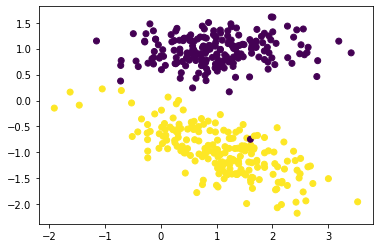

In [29]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [77]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        
        loss = 0
        
        loss += 0.5 * np.dot(W,W.T)
        
        m = X.shape[0]
        for i in range(m):
            ti = Y[i] * (np.dot(W,X[i].T) + b)
            loss += self.C * max(0,(1-ti))
        
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,max_itr=300):
        
        n_features = X.shape[1]
        n_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        W = np.zeros((1,n_features))
        bias = 0
        
        losses = []
        
        for i in range(max_itr):
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            
            ids = np.arange(n_samples)
            np.random.shuffle(ids)
        
            # Batch Gradient Descent
            for batch_start in range(0,n_samples,batch_size):
                # Assume 0 gradient for the batch
                gradW = 0
                gradb = 0
            
                for j in range(batch_start,batch_start + batch_size):
                
                    if j < n_samples:
                        i = ids[j]
                
                        ti = Y[i] * (np.dot(W,X[i].T) + bias)
                    
                        if ti < 1:
                            gradW += c * Y[i] * X[i]
                            gradb += c * Y[i]
                        
                    
                W = W - n*W + n*gradW
                bias = bias + n*gradb
            
        
        self.W = W
        self.b = bias
        return W,bias,losses

In [104]:
mySVM = SVM()

In [105]:
W,b,losses = mySVM.fit(X,Y,max_itr=100)

In [106]:
W[0][0]

-0.3227131521625658

In [107]:
print(losses[0])
print(losses[-1])

400.0
14.960160074242884


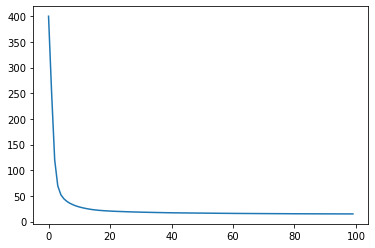

In [108]:
plt.plot(losses)
plt.show()

In [109]:
def plotHyperplane(w1,w2,b):
    
    plt.figure(figsize=(10,10))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1 + b)/w2
    
    x_p = -(w1*x_1 + b + 1)/w2
    x_n = -(w1*x_1 + b - 1)/w2
    
    plt.plot(x_1,x_2,label="Hyperplane WX + B=0")
    plt.plot(x_1,x_p,label="+ve Hyperplane WX + B=1")
    plt.plot(x_1,x_n,label="-ve Hyperplane WX + B=-1" )
    plt.legend()
    
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()

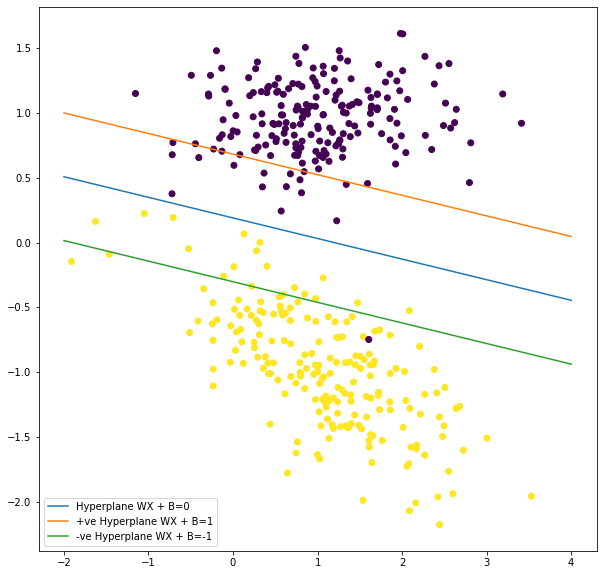

In [110]:
plotHyperplane(W[0][0],W[0][1],b)

### Visualising Support Vectors, Positive and Negative Hyperplanes

In [111]:
# Effect of changing 'C' - The Penalty Constant

mySVM2 = SVM(C=500)
W2,b2,losses2 = mySVM2.fit(X,Y,max_itr=100)

In [112]:
W2[0][0]

-5.469267865974666

In [113]:
print(losses2[0])
print(losses2[-1])

200000.0
5956.644660341604


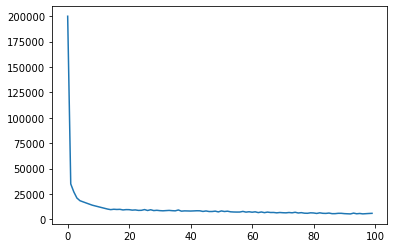

In [114]:
plt.plot(losses2)
plt.show()

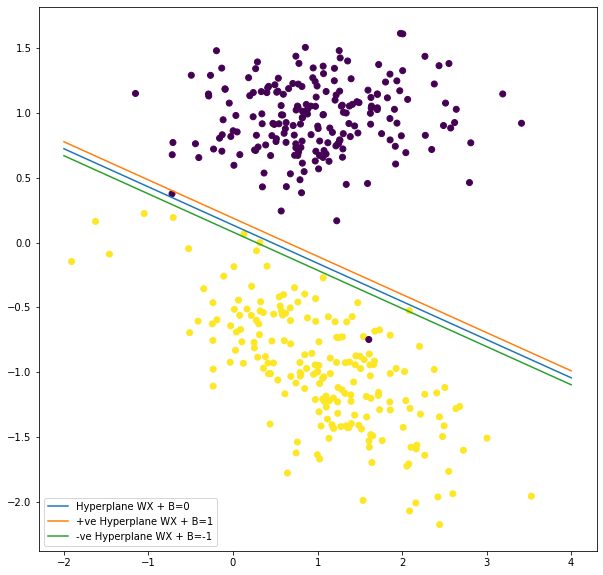

In [115]:
plotHyperplane(W2[0][0],W2[0][1],b2)